In [1]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset,DataLoader
import timm.models.vision_transformer as ViT
import matplotlib.pyplot as plt
from torch.utils.data.dataloader import default_collate 
from tqdm import tqdm

import sys
sys.path.insert(0, '../../packages/')
from data_handlers.DustPredictionDataset import *
from training.train_model import *
from data_handlers.augmentations import *
from utils.training_loop_plotting import *
# from utils.meteorology_printing import * # Can't install on docker...

results_dir = "../../results_models/presentation/"


In [2]:
# !pip install timm
# !pip install cartopy

# !pip install git+https://github.com/pvigier/perlin-numpy

In [3]:
# train_dataset = DustPredictionDataset(torch.load(presentation_dir+"tensor_train_meteorology.pkl"),
#                                       torch.load(presentation_dir+"tensor_train_dust.pkl"),
#                                       torch.load(presentation_dir+"times_train.pkl"))
# valid_dataset = DustPredictionDataset(torch.load(presentation_dir+"tensor_valid_meteorology.pkl"),
#                                       torch.load(presentation_dir+"tensor_valid_dust.pkl"),
#                                       torch.load(presentation_dir+"times_valid.pkl"))

In [4]:
print_strs = ["dust(t=0)","\u0394dust(t=0)","dust(t=-24h)","\u0394dust(t=-24h)",
              "dust(t=24h)","\u0394dust(t=24h)","dust(t=48h)","\u0394dust(t=48h)",
              "dust(t=72h)","\u0394dust(t=72h)",]
print_cols = [i for i in range(10)]

def print_all_losses(train_losses, valid_losses,
                     train_lags_losses, train_delta_lags_losses, 
                     valid_lags_losses, valid_delta_lags_losses, title):
    print(title)
    print("Loss for training:")
    plot_train_valid(train_losses,valid_losses)
    print("Losses, separated per lag:")
    for i in print_cols:
        print(print_strs[i])
        if i%2==0:
            plot_train_valid(train_lags_losses[:,i//2],valid_lags_losses[:,i//2])
        else:
            plot_train_valid(train_delta_lags_losses[:,i//2],valid_delta_lags_losses[:,i//2])


lr = 0.0001 cosine warmup scheduler, no augmentation, weighted loss
Loss for training:


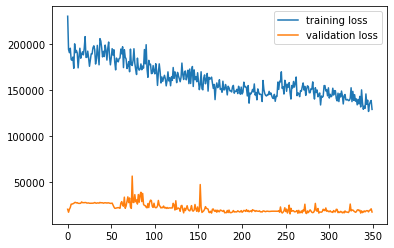

Losses, separated per lag:
dust(t=0)


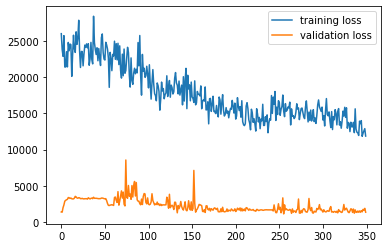

Δdust(t=0)


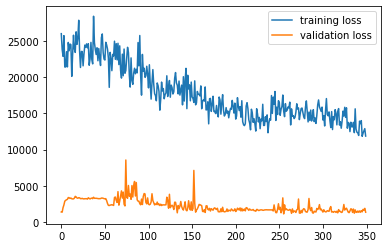

dust(t=-24h)


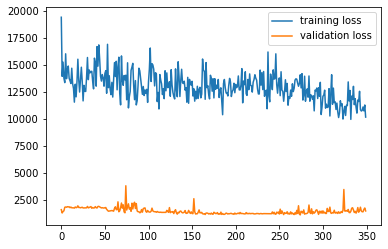

Δdust(t=-24h)


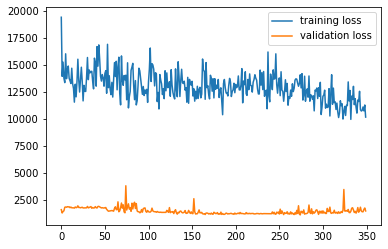

dust(t=24h)


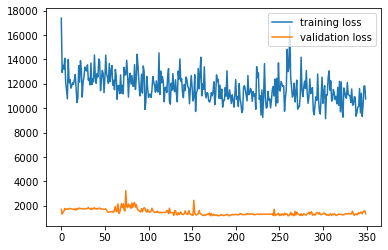

Δdust(t=24h)


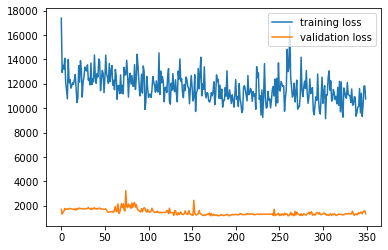

dust(t=48h)


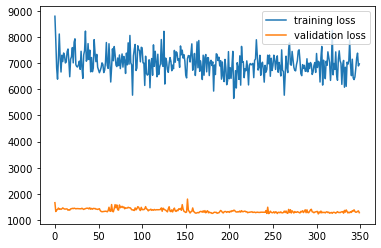

Δdust(t=48h)


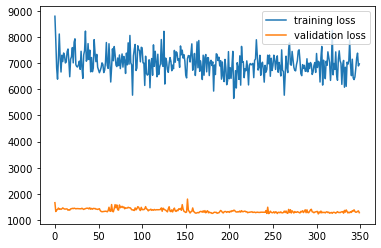

dust(t=72h)


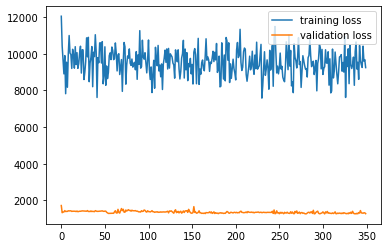

Δdust(t=72h)


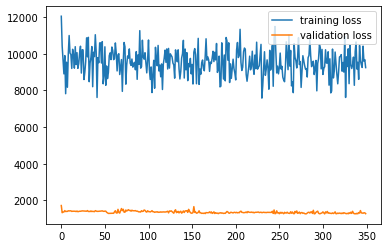

In [5]:
results_dir_specific = results_dir+"sequential_cosine_decay/"


best_model_path = results_dir_specific+"best_model_state.pt"
last_model_path = results_dir_specific+"last_model_state.pt"
train_losses_path = results_dir_specific+"train_losses.pkl"
train_lags_losses_path = results_dir_specific+"train_lags_losses.pkl"
train_delta_lags_losses_path = results_dir_specific+"train_delta_lags_losses.pkl"
valid_losses_path = results_dir_specific+"valid_losses.pkl"
valid_lags_losses_path = results_dir_specific+"valid_lags_losses.pkl"
valid_delta_lags_losses_path = results_dir_specific+"valid_delta_lags_losses.pkl"

train_losses = torch.load(train_losses_path)
valid_losses = torch.load(valid_losses_path)
train_lags_losses = torch.load(train_lags_losses_path)
valid_lags_losses = torch.load(valid_lags_losses_path)
train_delta_lags_losses = torch.load(train_lags_losses_path)
valid_delta_lags_losses = torch.load(valid_lags_losses_path)

print_all_losses(train_losses, valid_losses,
                 train_lags_losses, train_delta_lags_losses, 
                 valid_lags_losses, valid_delta_lags_losses, 
                 "lr = 0.0001 cosine warmup scheduler, no augmentation, weighted loss")

lr = 0.00001, augmentation, weighted loss
Loss for training:


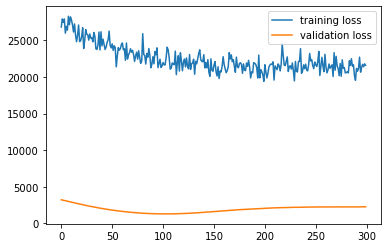

Losses, separated per lag:
dust(t=0)


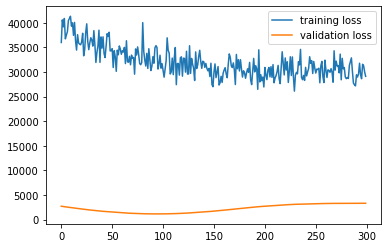

Δdust(t=0)


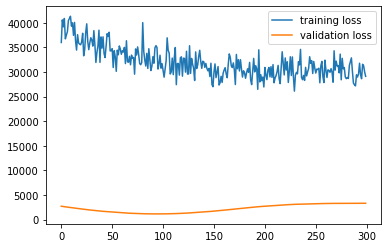

dust(t=-24h)


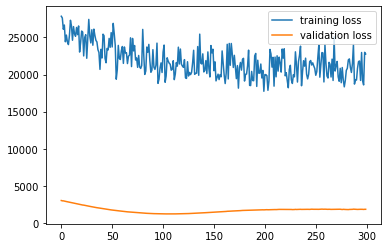

Δdust(t=-24h)


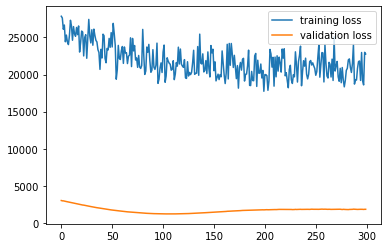

dust(t=24h)


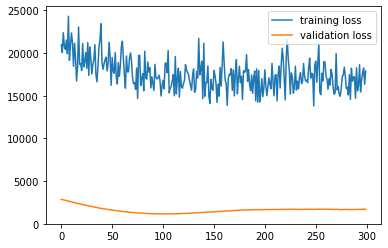

Δdust(t=24h)


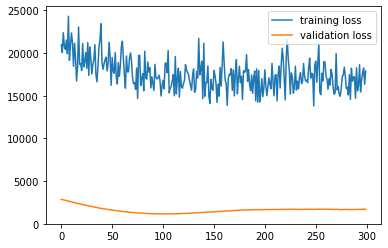

dust(t=48h)


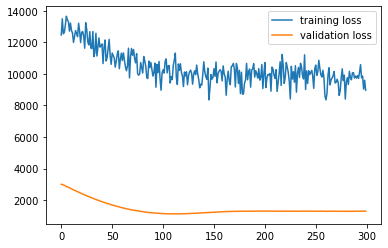

Δdust(t=48h)


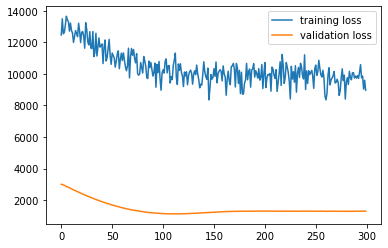

dust(t=72h)


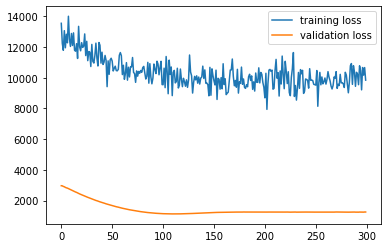

Δdust(t=72h)


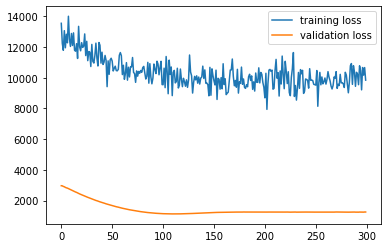

In [5]:
results_dir_specific = results_dir+"presentation_set_e300_lr0p00001_augmentation_weighted_loss/"


best_model_path = results_dir_specific+"best_model_state.pt"
last_model_path = results_dir_specific+"last_model_state.pt"
train_losses_path = results_dir_specific+"train_losses.pkl"
train_lags_losses_path = results_dir_specific+"train_lags_losses.pkl"
train_delta_lags_losses_path = results_dir_specific+"train_delta_lags_losses.pkl"
valid_losses_path = results_dir_specific+"valid_losses.pkl"
valid_lags_losses_path = results_dir_specific+"valid_lags_losses.pkl"
valid_delta_lags_losses_path = results_dir_specific+"valid_delta_lags_losses.pkl"

train_losses = torch.load(train_losses_path)
valid_losses = torch.load(valid_losses_path)
train_lags_losses = torch.load(train_lags_losses_path)
valid_lags_losses = torch.load(valid_lags_losses_path)
train_delta_lags_losses = torch.load(train_lags_losses_path)
valid_delta_lags_losses = torch.load(valid_lags_losses_path)

print_all_losses(train_losses, valid_losses,
                 train_lags_losses, train_delta_lags_losses, 
                 valid_lags_losses, valid_delta_lags_losses, 
                 "lr = 0.00001, augmentation, weighted loss")

lr = 0.0001, no augmentation
Loss for training:


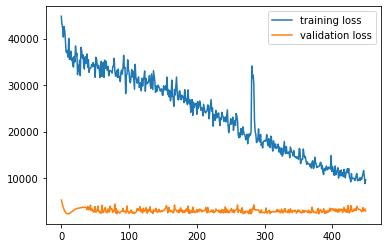

Losses, separated per lag:
dust(t=0)


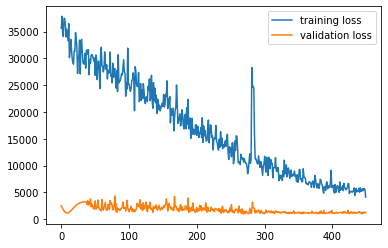

Δdust(t=0)


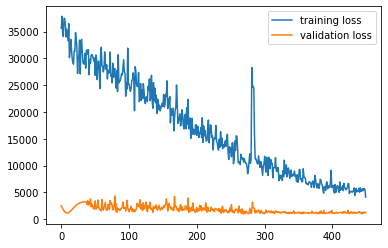

dust(t=-24h)


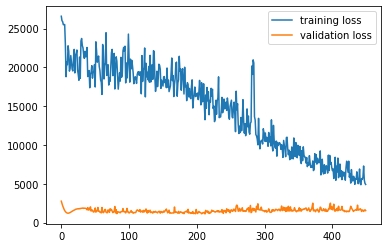

Δdust(t=-24h)


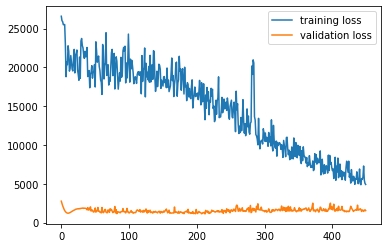

dust(t=24h)


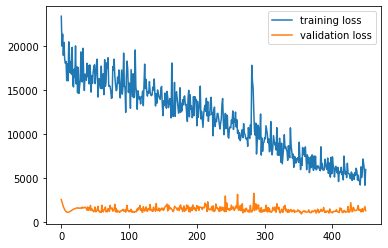

Δdust(t=24h)


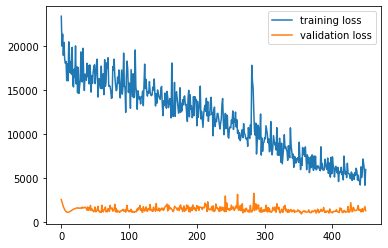

dust(t=48h)


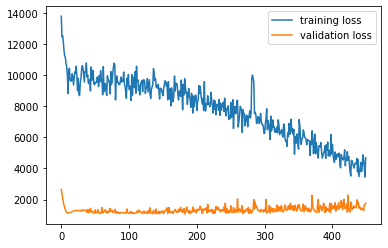

Δdust(t=48h)


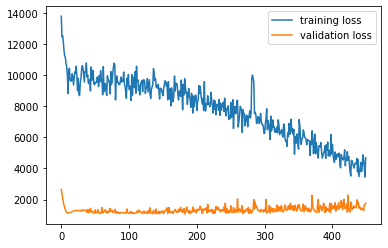

dust(t=72h)


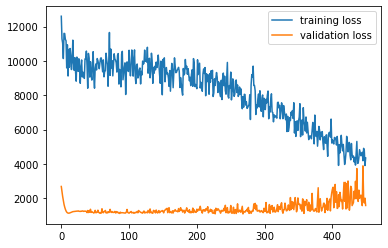

Δdust(t=72h)


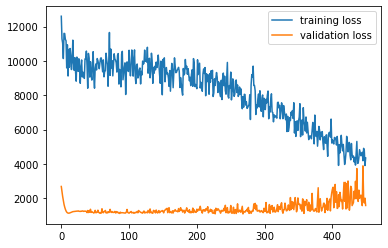

In [6]:
results_dir_specific = results_dir+"presentation_set_e450_lr0p0001_noaugmentation/"


best_model_path = results_dir_specific+"best_model_state.pt"
last_model_path = results_dir_specific+"last_model_state.pt"
train_losses_path = results_dir_specific+"train_losses.pkl"
train_lags_losses_path = results_dir_specific+"train_lags_losses.pkl"
train_delta_lags_losses_path = results_dir_specific+"train_delta_lags_losses.pkl"
valid_losses_path = results_dir_specific+"valid_losses.pkl"
valid_lags_losses_path = results_dir_specific+"valid_lags_losses.pkl"
valid_delta_lags_losses_path = results_dir_specific+"valid_delta_lags_losses.pkl"

train_losses = torch.load(train_losses_path)
valid_losses = torch.load(valid_losses_path)
train_lags_losses = torch.load(train_lags_losses_path)
valid_lags_losses = torch.load(valid_lags_losses_path)
train_delta_lags_losses = torch.load(train_lags_losses_path)
valid_delta_lags_losses = torch.load(valid_lags_losses_path)

print_all_losses(train_losses, valid_losses,
                 train_lags_losses, train_delta_lags_losses, 
                 valid_lags_losses, valid_delta_lags_losses, 
                 "lr = 0.0001, no augmentation")

lr = 0.00001, no augmentation, weighted loss
Loss for training:


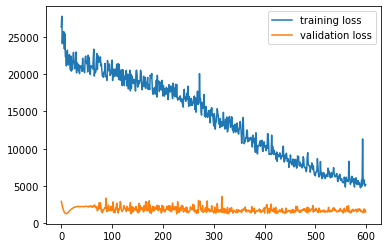

Losses, separated per lag:
dust(t=0)


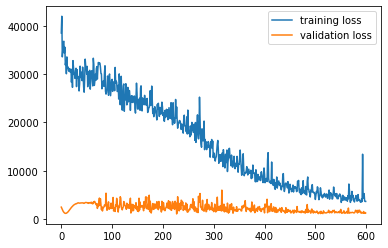

Δdust(t=0)


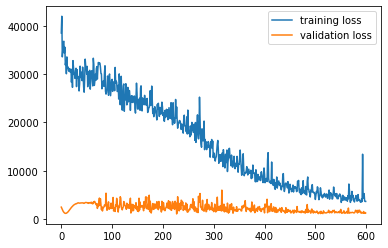

dust(t=-24h)


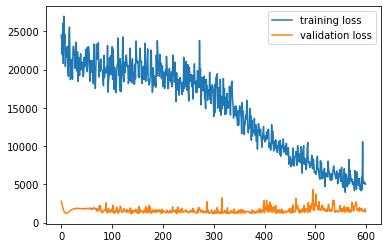

Δdust(t=-24h)


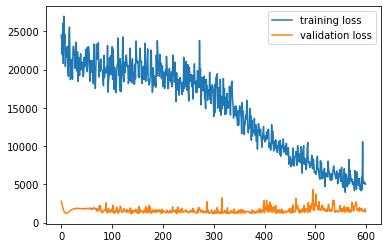

dust(t=24h)


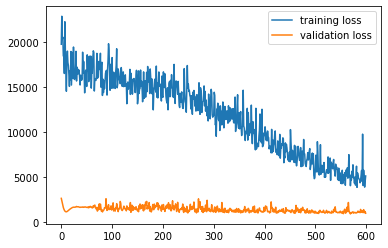

Δdust(t=24h)


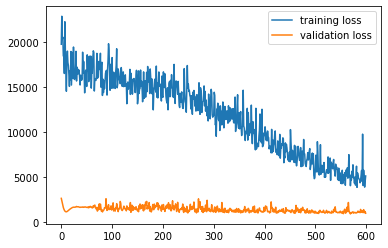

dust(t=48h)


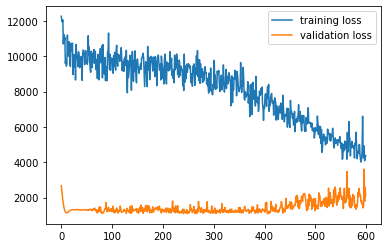

Δdust(t=48h)


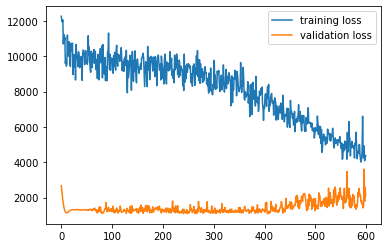

dust(t=72h)


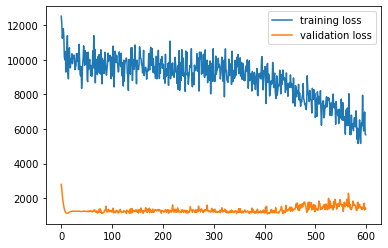

Δdust(t=72h)


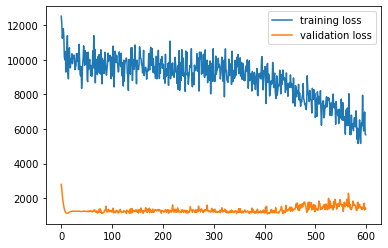

In [7]:
results_dir_specific = results_dir+"presentation_set_e600_lr0p00001_noaugmentation_weighted_loss/"


best_model_path = results_dir_specific+"best_model_state.pt"
last_model_path = results_dir_specific+"last_model_state.pt"
train_losses_path = results_dir_specific+"train_losses.pkl"
train_lags_losses_path = results_dir_specific+"train_lags_losses.pkl"
train_delta_lags_losses_path = results_dir_specific+"train_delta_lags_losses.pkl"
valid_losses_path = results_dir_specific+"valid_losses.pkl"
valid_lags_losses_path = results_dir_specific+"valid_lags_losses.pkl"
valid_delta_lags_losses_path = results_dir_specific+"valid_delta_lags_losses.pkl"

train_losses = torch.load(train_losses_path)
valid_losses = torch.load(valid_losses_path)
train_lags_losses = torch.load(train_lags_losses_path)
valid_lags_losses = torch.load(valid_lags_losses_path)
train_delta_lags_losses = torch.load(train_lags_losses_path)
valid_delta_lags_losses = torch.load(valid_lags_losses_path)

print_all_losses(train_losses, valid_losses,
                 train_lags_losses, train_delta_lags_losses, 
                 valid_lags_losses, valid_delta_lags_losses, 
                 "lr = 0.00001, no augmentation, weighted loss")

lr = 0.0001, no augmentation, weighted loss, split 5
Loss for training:


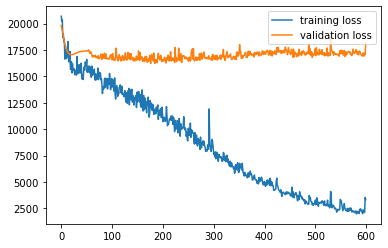

Losses, separated per lag:
dust(t=0)


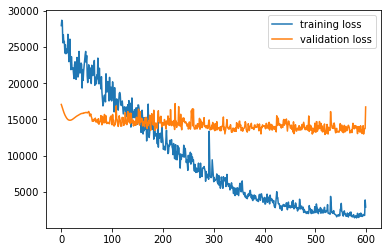

Δdust(t=0)


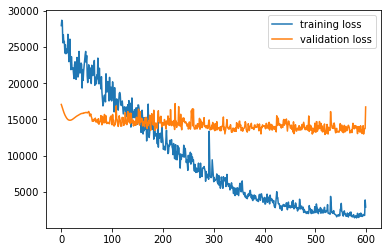

dust(t=-24h)


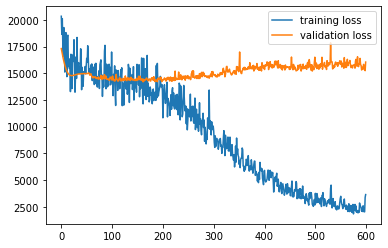

Δdust(t=-24h)


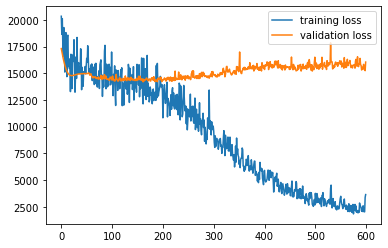

dust(t=24h)


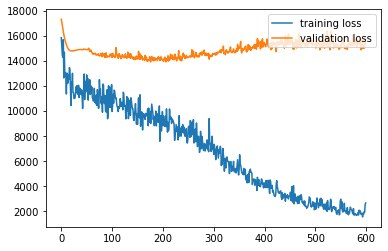

Δdust(t=24h)


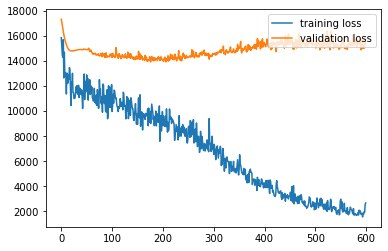

dust(t=48h)


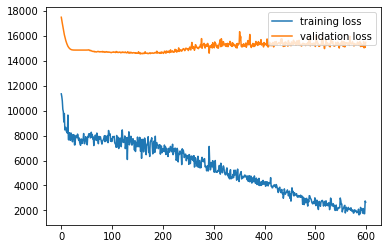

Δdust(t=48h)


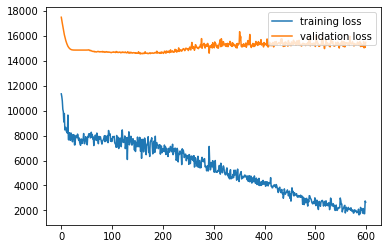

dust(t=72h)


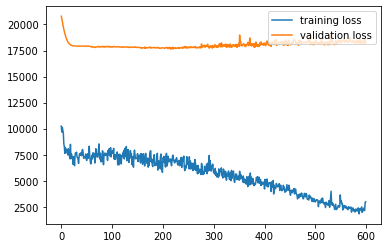

Δdust(t=72h)


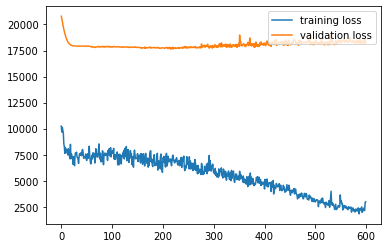

In [8]:
results_dir_specific = results_dir+"weighted_loss_split5/"


best_model_path = results_dir_specific+"best_model_state.pt"
last_model_path = results_dir_specific+"last_model_state.pt"
train_losses_path = results_dir_specific+"train_losses.pkl"
train_lags_losses_path = results_dir_specific+"train_lags_losses.pkl"
train_delta_lags_losses_path = results_dir_specific+"train_delta_lags_losses.pkl"
valid_losses_path = results_dir_specific+"valid_losses.pkl"
valid_lags_losses_path = results_dir_specific+"valid_lags_losses.pkl"
valid_delta_lags_losses_path = results_dir_specific+"valid_delta_lags_losses.pkl"

train_losses = torch.load(train_losses_path)
valid_losses = torch.load(valid_losses_path)
train_lags_losses = torch.load(train_lags_losses_path)
valid_lags_losses = torch.load(valid_lags_losses_path)
train_delta_lags_losses = torch.load(train_lags_losses_path)
valid_delta_lags_losses = torch.load(valid_lags_losses_path)

print_all_losses(train_losses, valid_losses,
                 train_lags_losses, train_delta_lags_losses, 
                 valid_lags_losses, valid_delta_lags_losses, 
                 "lr = 0.0001, no augmentation, weighted loss, split 5")

In [9]:
# presentation set validation year: 2017
# presentation set sample training year: 2018

In [7]:
data_dir = "../../data/presentation_examinations/"

meteorology_valid = torch.load(data_dir+"meteorology_2017.pkl")
meteorology_train = torch.load(data_dir+"meteorology_2018.pkl")
dust_valid = torch.load(data_dir+"dust_2017.pkl")
dust_train = torch.load(data_dir+"dust_2018.pkl")
times_valid = torch.load(data_dir+"times_2017.pkl")
times_train = torch.load(data_dir+"times_2018.pkl")

In [11]:
sample_dust = dust_valid
sample_times = times_valid
print(sample_dust.shape,"\n",sample_times)

torch.Size([2183, 10]) 
 DatetimeIndex(['2017-01-01 00:00:00+00:00', '2017-01-01 09:00:00+00:00',
               '2017-01-01 12:00:00+00:00', '2017-01-01 21:00:00+00:00',
               '2017-01-02 00:00:00+00:00', '2017-01-02 09:00:00+00:00',
               '2017-01-02 12:00:00+00:00', '2017-01-02 21:00:00+00:00',
               '2017-01-03 00:00:00+00:00', '2017-01-03 09:00:00+00:00',
               ...
               '2017-12-30 18:00:00+00:00', '2017-12-30 21:00:00+00:00',
               '2017-12-31 00:00:00+00:00', '2017-12-31 03:00:00+00:00',
               '2017-12-31 06:00:00+00:00', '2017-12-31 09:00:00+00:00',
               '2017-12-31 12:00:00+00:00', '2017-12-31 15:00:00+00:00',
               '2017-12-31 18:00:00+00:00', '2017-12-31 21:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=2183, freq=None)


Truth,dust(t=0),0
DatetimeIndex(['2017-10-13 12:00:00+00:00', '2017-10-13 15:00:00+00:00',
               '2017-10-13 18:00:00+00:00', '2017-10-13 21:00:00+00:00',
               '2017-10-14 00:00:00+00:00', '2017-10-14 03:00:00+00:00',
               '2017-10-14 06:00:00+00:00', '2017-10-14 09:00:00+00:00',
               '2017-10-14 12:00:00+00:00', '2017-10-14 15:00:00+00:00',
               ...
               '2017-11-21 00:00:00+00:00', '2017-11-21 03:00:00+00:00',
               '2017-11-21 06:00:00+00:00', '2017-11-21 09:00:00+00:00',
               '2017-11-21 12:00:00+00:00', '2017-11-21 15:00:00+00:00',
               '2017-11-21 18:00:00+00:00', '2017-11-21 21:00:00+00:00',
               '2017-11-22 00:00:00+00:00', '2017-11-22 03:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=200, freq=None)


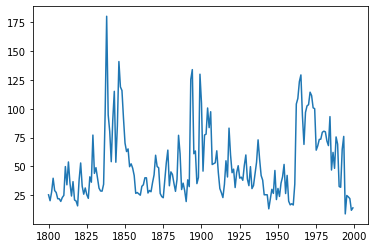

In [12]:
x = np.arange(sample_dust.shape[0])
sample_col = 0

print(f"Truth,{print_strs[sample_col]},{print_cols[sample_col]}")

dates_idxs = np.arange(1800,2000)
print(sample_times[dates_idxs])

plt.plot(x[dates_idxs],sample_dust[dates_idxs,sample_col])
# plt.xticks(x[[0,-1]], sample_times[[0,-1]]) # sample_times[idxs[0]].... move into a package
plt.show()

In [135]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

valid_dataset = DustPredictionDataset(meteorology_valid,dust_valid,times_valid)
train_dataset = DustPredictionDataset(meteorology_train,dust_train,times_train)

valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False,collate_fn=valid_dataset.collate_fn)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False,collate_fn=train_dataset.collate_fn)

sample_data = next(iter(valid_loader))
print("Sample data loading:")
print(sample_data[0][0].shape, sample_data[0][1].shape, len(sample_data[1]))

model = ViT.VisionTransformer(img_size=(81,81), patch_size=(9,9), in_chans=17, num_classes=10, embed_dim=512, depth=8,
                 num_heads=8, mlp_ratio=2., qkv_bias=True, representation_size=None, distilled=False,
                 drop_rate=0.1, attn_drop_rate=0.1, drop_path_rate=0.1)
model.to(device)

cuda
Sample data loading:
torch.Size([64, 17, 81, 81]) torch.Size([64, 10]) 64


VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(17, 512, kernel_size=(9, 9), stride=(9, 9))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.1, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((512,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=512, out_features=1536, bias=True)
        (attn_drop): Dropout(p=0.1, inplace=False)
        (proj): Linear(in_features=512, out_features=512, bias=True)
        (proj_drop): Dropout(p=0.1, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((512,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=512, out_features=1024, bias=True)
        (act): GELU()
        (fc2): Linear(in_features=1024, out_features=512, bias=True)
        (drop): Dropout(p=0.1, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((512,), eps=1e-06, elementwise_affine=True)
      (attn): 

In [74]:
predicted_dust_valid = []
predicted_dust_train = []

def calculate_predictions(model, loader):
    predictions_list = []
    model.eval()
    for minibatch, _ in tqdm(loader):
        x = minibatch[0].float()
        x = x.to(device=device)
        pred = model(x)
        predictions_list.append(pred.data.cpu().numpy())
    return np.vstack(predictions_list)

In [6]:
model_dir = results_dir+"presentation_set_e300_lr0p00001_augmentation_weighted_loss/" #1
# model_dir = results_dir+"presentation_set_e450_lr0p0001_noaugmentation/" #2
# model_dir = results_dir+"presentation_set_e600_lr0p00001_noaugmentation_weighted_loss/" #3
# model_dir = results_dir+"weighted_loss_split5/" #4

model_state_path = model_dir+"best_model_state.pt"
# model_state_path = model_dir+"last_model_state.pt"

model.load_state_dict(torch.load(model_state_path))
model.to(device)
model.eval()

NameError: name 'model' is not defined

In [38]:
sample_idxs = [100,1001]

sample_predictions = model(meteorology_valid[sample_idxs,:,:,:].to(device))
sample_predictions, dust_valid[sample_idxs]

(tensor([[ 4.9823e+01,  2.7441e-02,  4.5440e+01, -4.2760e-01,  4.6206e+01,
           3.5982e-01,  4.2751e+01,  6.0224e-01,  4.2821e+01, -8.4048e-01],
         [ 4.9822e+01,  2.7384e-02,  4.5440e+01, -4.2768e-01,  4.6207e+01,
           3.5970e-01,  4.2752e+01,  6.0236e-01,  4.2821e+01, -8.4044e-01]],
        device='cuda:0', grad_fn=<AddmmBackward>),
 tensor([[ 24.4500, -14.2000,  17.5667, -14.9000,  45.3667, -43.7500, 100.5833,
            0.9500, 127.1667,   5.8833],
         [ 41.3333,   4.4333,  69.3833,  23.9167,  45.0500,   2.2833,  52.6333,
           13.3833,  53.5833,   7.8167]], dtype=torch.float64))

In [57]:
a = sample_predictions.data.cpu().numpy()
a.shape

(2, 10)

In [59]:
b = np.vstack([a,a,a])
b.shape

(6, 10)

In [75]:
predicted_dust_valid_model1 = calculate_predictions(model, valid_loader)
predicted_dust_valid_model1.shape

100%|██████████| 35/35 [00:05<00:00,  5.91it/s]


(2183, 10)

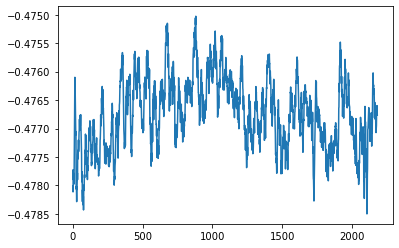

In [84]:
x = np.arange(predicted_dust_valid_model1.shape[0])
plt.plot(x,predicted_dust_valid_model1[:,0])

In [89]:
model_dir = results_dir+"presentation_set_e300_lr0p00001_augmentation_weighted_loss/" #1
# model_dir = results_dir+"presentation_set_e450_lr0p0001_noaugmentation/" #2
# model_dir = results_dir+"presentation_set_e600_lr0p00001_noaugmentation_weighted_loss/" #3
# model_dir = results_dir+"weighted_loss_split5/" #4

# model_state_path = model_dir+"best_model_state.pt"
model_state_path = model_dir+"last_model_state.pt"

model.load_state_dict(torch.load(model_state_path))
model.to(device)
model.eval()

predicted_dust_train_model1 = calculate_predictions(model, train_loader)
predicted_dust_train_model1.shape

100%|██████████| 37/37 [00:06<00:00,  5.77it/s]


(2352, 10)

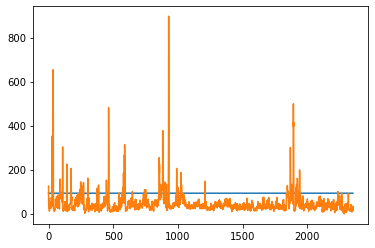

In [90]:
x = np.arange(predicted_dust_train_model1.shape[0])
plt.plot(x,predicted_dust_train_model1[:,0], x,dust_train[:,0])

100%|██████████| 35/35 [00:05<00:00,  5.91it/s]


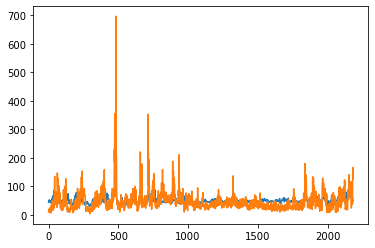

In [91]:
# model_dir = results_dir+"presentation_set_e300_lr0p00001_augmentation_weighted_loss/" #1
model_dir = results_dir+"presentation_set_e450_lr0p0001_noaugmentation/" #2
# model_dir = results_dir+"presentation_set_e600_lr0p00001_noaugmentation_weighted_loss/" #3
# model_dir = results_dir+"weighted_loss_split5/" #4

model_state_path = model_dir+"best_model_state.pt"
# model_state_path = model_dir+"last_model_state.pt"

model.load_state_dict(torch.load(model_state_path))
model.to(device)
model.eval()

predicted_dust_valid_model2 = calculate_predictions(model, valid_loader)
predicted_dust_valid_model2.shape
x = np.arange(predicted_dust_valid_model2.shape[0])
plt.plot(x,predicted_dust_valid_model2[:,0], x,dust_valid[:,0])

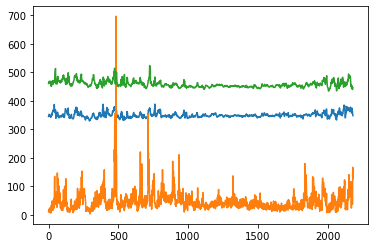

In [97]:
x = np.arange(predicted_dust_valid_model2.shape[0])
plt.plot(x,predicted_dust_valid_model2[:,0]+300, x,dust_valid[:,0], 
         x,predicted_dust_valid_model2[:,2]+400)

In [115]:
print(dust_valid[:4,[1,3,5,7,9]])
print(dust_valid[4:8,[1,3,5,7,9]])
print(dust_valid[8:12,[1,3,5,7,9]])
print(dust_valid[12:16,[1,3,5,7,9]])
print(dust_valid[16:20,[1,3,5,7,9]])
print(dust_valid[20:24,[1,3,5,7,9]])
print(times_valid[:24])

tensor([[ -6.6167,  -7.1333,  -4.5000,  -7.1833,  -9.0000],
        [-11.3833,   1.3167, -29.8167, -19.0333, -12.2167],
        [ -2.2500,  -1.1500,   0.3333,   4.1500,  -4.8967],
        [  0.9333,  -2.9833,  -2.4000,  -1.5000,   7.7700]],
       dtype=torch.float64)
tensor([[ -4.5000,  -6.6167,  -7.1833,  -9.0000, -13.5533],
        [-29.8167, -11.3833, -19.0333, -12.2167, -10.8333],
        [  0.3333,  -2.2500,   4.1500,  -4.8967,   3.5500],
        [ -2.4000,   0.9333,  -1.5000,   7.7700, -12.4250]],
       dtype=torch.float64)
tensor([[ -7.1833,  -4.5000,  -9.0000, -13.5533,  -3.6500],
        [-19.0333, -29.8167, -12.2167, -10.8333, -13.7500],
        [  4.1500,   0.3333,  -4.8967,   3.5500, -11.5500],
        [ -1.5000,  -2.4000,   7.7700, -12.4250,  -0.3000]],
       dtype=torch.float64)
tensor([[ -9.0000,  -7.1833, -13.5533,  -3.6500,  -3.2833],
        [  4.7167,   6.8833,   4.2833,  -2.0167,  -7.0833],
        [  3.2500,  11.0500,  18.5167,  31.8833,  -2.5333],
        [-12.

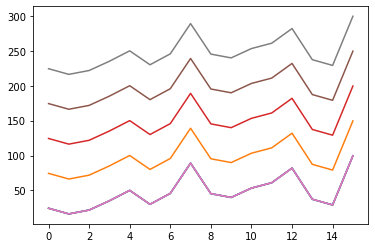

In [140]:
plot_len = 16
i_first = 100
x = np.arange(plot_len)
plt.plot(x, dust_valid[i_first:i_first+plot_len,0],
         x, dust_valid[i_first+8:i_first+plot_len+8,2]+50)

plt.plot(x, dust_valid[i_first:i_first+plot_len,0],
         x, dust_valid[i_first-8:i_first+plot_len-8,4]+100)

plt.plot(x, dust_valid[i_first:i_first+plot_len,0],
         x, dust_valid[i_first-16:i_first+plot_len-16,6]+150)

plt.plot(x, dust_valid[i_first:i_first+plot_len,0],
         x, dust_valid[i_first-24:i_first+plot_len-24,8]+200)

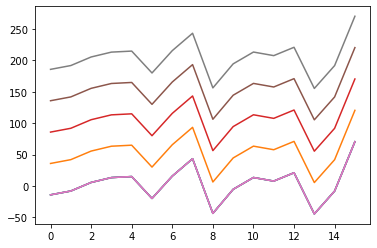

In [141]:
plot_len = 16
i_first = 100
x = np.arange(plot_len)
plt.plot(x, dust_valid[i_first:i_first+plot_len,1],
         x, dust_valid[i_first+8:i_first+plot_len+8,3]+50)

plt.plot(x, dust_valid[i_first:i_first+plot_len,1],
         x, dust_valid[i_first-8:i_first+plot_len-8,5]+100)

plt.plot(x, dust_valid[i_first:i_first+plot_len,1],
         x, dust_valid[i_first-16:i_first+plot_len-16,7]+150)

plt.plot(x, dust_valid[i_first:i_first+plot_len,1],
         x, dust_valid[i_first-24:i_first+plot_len-24,9]+200)

In [77]:
def print_predictions(predicted_dust, true_dust, times=None, idxs=None, spacing=50, show_times = True, 
                      bbox_to_anchor_lags = (1.02,1.02), bbox_to_anchor_delta_lags = (1.02,1.02), 
                      num_ticks=8, th=73.4):
    # assuming period is longer than 24
    idx_shifts_lags = {
        "T+0h, dust":   {"col_idx": 0, "idx_shift":  0}, 
        "T-24h, dust": {"col_idx": 2, "idx_shift":  8}, 
        "T+24h, dust" : {"col_idx": 4, "idx_shift": -8}, 
        "T+48h, dust" : {"col_idx": 6, "idx_shift":-16}, 
        "T+72h, dust" : {"col_idx": 8, "idx_shift":-24}
    }
    idx_shifts_delta_lags = {
        "T+0h, \u0394dust"  : {"col_idx": 1, "idx_shift":  0}, 
        "T-24h, \u0394dust": {"col_idx": 3, "idx_shift":  8}, 
        "T+24h, \u0394dust" : {"col_idx": 5, "idx_shift": -8}, 
        "T+48h, \u0394dust" : {"col_idx": 7, "idx_shift":-16}, 
        "T+72h, \u0394dust" : {"col_idx": 9, "idx_shift":-24}, 
    }
    if idxs is None:
        idxs = np.arange(predicted_dust.shape[0])
    idx_start = idxs[0]+24
    idx_end = idxs[-1]-24
    idxs_cut = np.arange(idx_start,idx_end)
    x = np.arange(idx_start,idx_end)
    time_ticks = times[x]
    time_ticks = time_ticks[:-1:(x.shape[0]//num_ticks)]
    x_for_xticks = x[:-1:(x.shape[0]//num_ticks)]
    print("Dust Lags:")
    plt.plot(x,true_dust[idx_start:idx_end,0], label="Ground Truth")
    plt.plot(x, x*0+th, color="red", linestyle="dashed", label="Event Threshold")
    for i,lag_name in enumerate(idx_shifts_lags.keys()):
        step_string = "" if (i+1)*spacing==0 else "+"+str((i+1)*spacing)
        idxs_shifted_start = idx_shifts_lags[lag_name]["idx_shift"]+idx_start
        idxs_shifted_end = idx_shifts_lags[lag_name]["idx_shift"]+idx_end
        col = idx_shifts_lags[lag_name]["col_idx"]
        plt.plot(x, (i+1)*spacing+predicted_dust[idxs_shifted_start:idxs_shifted_end,col], 
                 label=lag_name+step_string)
        plt.legend(bbox_to_anchor=bbox_to_anchor_lags)
        if show_times:
            plt.xticks(x_for_xticks,time_ticks,rotation=90)
    plt.show()
    print("\u0394Dust Lags:")
    plt.plot(x,true_dust[idx_start:idx_end,1], label="Ground Truth")
    for i,lag_name in enumerate(idx_shifts_delta_lags.keys()):
        step_string = "" if (i+1)*spacing==0 else "+"+str((i+1)*spacing)
        idxs_shifted_start = idx_shifts_delta_lags[lag_name]["idx_shift"]+idx_start
        idxs_shifted_end = idx_shifts_delta_lags[lag_name]["idx_shift"]+idx_end
        col = idx_shifts_delta_lags[lag_name]["col_idx"]
        plt.plot(x, (i+1)*spacing+predicted_dust[idxs_shifted_start:idxs_shifted_end,col], 
                 label=lag_name+step_string)
        plt.legend(bbox_to_anchor=bbox_to_anchor_delta_lags)
        if show_times:
            plt.xticks(x_for_xticks,time_ticks,rotation=90)
    plt.show()
    

In [311]:
a = np.arange(10)
a, a[:-1:2]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([0, 2, 4, 6, 8]))

Debugging
Dust Lags:


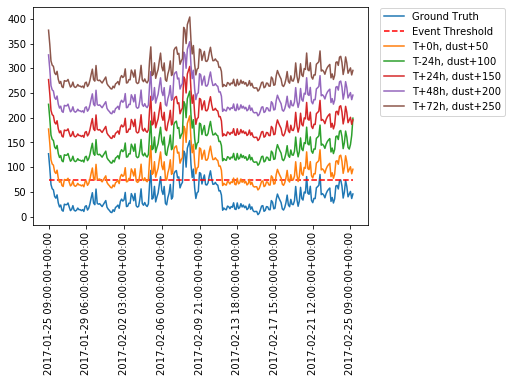

ΔDust Lags:


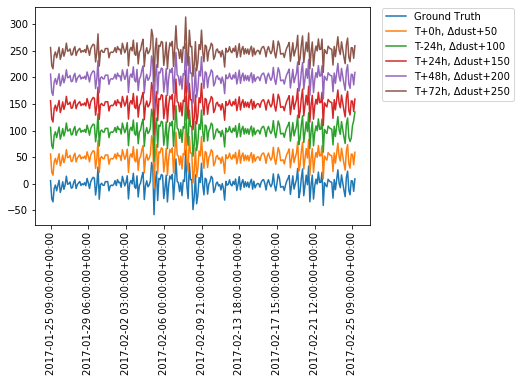

In [312]:
print("Debugging")
idxs = np.arange(100,400)
print_predictions(dust_valid, dust_valid, times=times_valid, idxs=idxs, spacing=50, 
                  bbox_to_anchor_lags=(1.02,1.02), bbox_to_anchor_delta_lags=(1.02,1.02))

Model 2
Dust Lags:


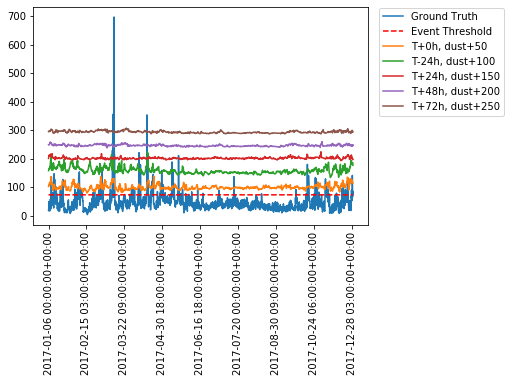

ΔDust Lags:


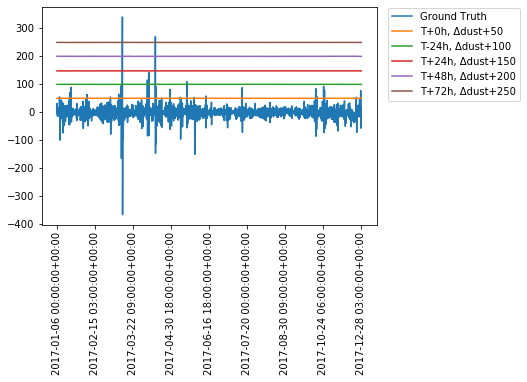

In [313]:
print("Model 2")
idxs = np.arange(100,400)
print_predictions(predicted_dust_valid_model2, dust_valid, times=times_valid, idxs=None, spacing=50,
                  bbox_to_anchor_lags = (1.42,1.02), bbox_to_anchor_delta_lags = (1.02,1.02), 
                  show_times=True)

In [325]:
# model_dir = results_dir+"presentation_set_e300_lr0p00001_augmentation_weighted_loss/" #1
# model_dir = results_dir+"presentation_set_e450_lr0p0001_noaugmentation/" #2
model_dir = results_dir+"presentation_set_e600_lr0p00001_noaugmentation_weighted_loss/" #3
# model_dir = results_dir+"weighted_loss_split5/" #4

model_state_path = model_dir+"best_model_state.pt"
# model_state_path = model_dir+"last_model_state.pt"

model.load_state_dict(torch.load(model_state_path))
model.to(device)
model.eval()

predicted_dust_valid_model3 = calculate_predictions(model, valid_loader)
predicted_dust_valid_model3.shape
# x = np.arange(predicted_dust_valid_model3.shape[0])
# plt.plot(x,predicted_dust_valid_model2[:,0], x,dust_valid[:,0])


100%|██████████| 35/35 [00:05<00:00,  5.84it/s]


(2183, 10)

Model 3, validation
Dust Lags:


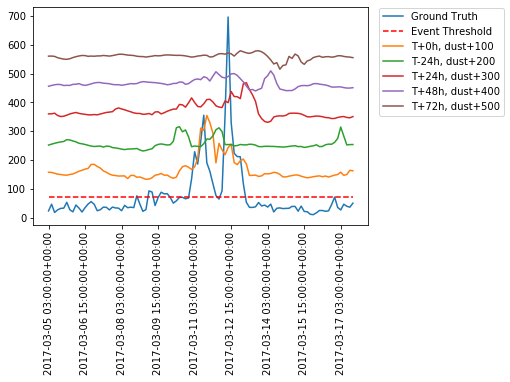

ΔDust Lags:


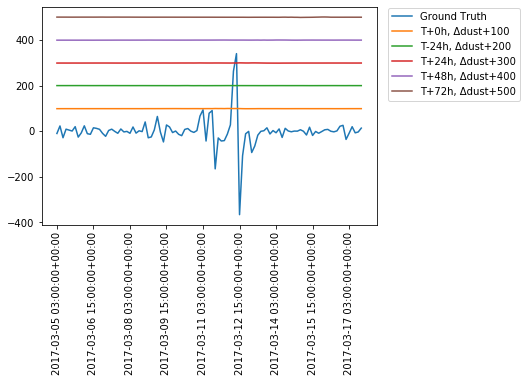

In [326]:
print("Model 3, validation")
idxs = np.arange(400,550)
print_predictions(predicted_dust_valid_model3, dust_valid, times=times_valid, idxs=idxs, spacing=100, 
                  bbox_to_anchor_lags = (1.42,1.02), bbox_to_anchor_delta_lags = (1.02,1.02), 
                  show_times=True)

In [329]:
# model_dir = results_dir+"presentation_set_e300_lr0p00001_augmentation_weighted_loss/" #1
# model_dir = results_dir+"presentation_set_e450_lr0p0001_noaugmentation/" #2
model_dir = results_dir+"presentation_set_e600_lr0p00001_noaugmentation_weighted_loss/" #3
# model_dir = results_dir+"weighted_loss_split5/" #4

# model_state_path = model_dir+"best_model_state.pt"
model_state_path = model_dir+"last_model_state.pt"

model.load_state_dict(torch.load(model_state_path))
model.to(device)
model.eval()

predicted_dust_train_model3 = calculate_predictions(model, train_loader)
predicted_dust_train_model3.shape

100%|██████████| 37/37 [00:06<00:00,  5.89it/s]


(2352, 10)

Model 3, training (overfitting)
Dust Lags:


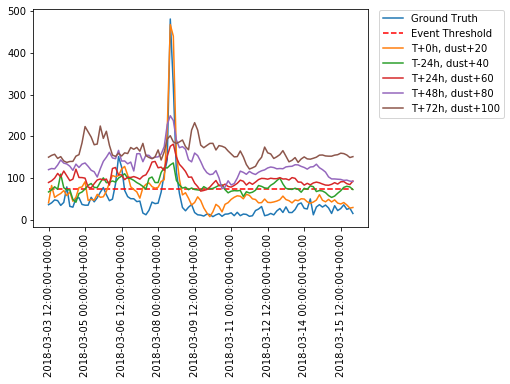

ΔDust Lags:


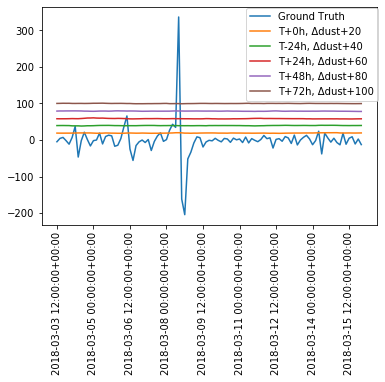

In [332]:
print("Model 3, training (overfitting)")
idxs = np.arange(400,550)
print_predictions(predicted_dust_train_model3, dust_train, times=times_train, idxs=idxs, spacing=20, 
                  bbox_to_anchor_lags = (1.42,1.02), bbox_to_anchor_delta_lags = (1.02,1.02), 
                  show_times=True)

In [78]:
print("Model 3, training (overfitting)")
idxs = np.arange(400,550)
print_predictions(predicted_dust_train_model3, dust_train, times=times_train, idxs=idxs, spacing=0, 
                  bbox_to_anchor_lags = (1.42,1.02), bbox_to_anchor_delta_lags = (1.02,1.02), 
                  show_times=True)

Model 3, training (overfitting)


NameError: name 'predicted_dust_train_model3' is not defined

In [333]:
# Attention heatmaps

In [ ]:
# # Attention Matrix
# attention_matrix = q @ kT
# print("attention matrix: ", attention_matrix.shape)
# plt.imshow(attention_matrix[3].detach().cpu().numpy())

# fig = plt.figure(figsize=(16, 8))
# fig.suptitle("Visualization of Attention", fontsize=24)
# fig.add_axes()
# img = np.asarray(img)
# ax = fig.add_subplot(2, 4, 1)
# ax.imshow(img)
# for i in range(7):  # visualize the 100th rows of attention matrices in the 0-7th heads
#     attn_heatmap = attention_matrix[i, 100, 1:].reshape((14, 14)).detach().cpu().numpy()
#     ax = fig.add_subplot(2, 4, i+2)
#     ax.imshow(attn_heatmap)

# ### inside ViT (timm):
#     def forward_features(self, x):
#         x = self.patch_embed(x)
#         cls_token = self.cls_token.expand(x.shape[0], -1, -1)  # stole cls_tokens impl from Phil Wang, thanks
#         if self.dist_token is None:
#             x = torch.cat((cls_token, x), dim=1)
#         else:
#             x = torch.cat((cls_token, self.dist_token.expand(x.shape[0], -1, -1), x), dim=1)
#         x = self.pos_drop(x + self.pos_embed)
#         x = self.blocks(x)
#         x = self.norm(x)
#         if self.dist_token is None:
#             return self.pre_logits(x[:, 0])
#         else:
#             return x[:, 0], x[:, 1]

#     def forward(self, x):
#         x = self.forward_features(x)
#         if self.head_dist is not None:
#             x, x_dist = self.head(x[0]), self.head_dist(x[1])  # x must be a tuple
#             if self.training and not torch.jit.is_scripting():
#                 # during inference, return the average of both classifier predictions
#                 return x, x_dist
#             else:
#                 return (x + x_dist) / 2
#         else:
#             x = self.head(x)
#         return x

#         self.blocks = nn.Sequential(*[
#             Block(
#                 dim=embed_dim, num_heads=num_heads, mlp_ratio=mlp_ratio, qkv_bias=qkv_bias, drop=drop_rate,
#                 attn_drop=attn_drop_rate, drop_path=dpr[i], norm_layer=norm_layer, act_layer=act_layer)
#             for i in range(depth)])


# class Block(nn.Module):

#     def __init__(self, dim, num_heads, mlp_ratio=4., qkv_bias=False, drop=0., attn_drop=0.,
#                  drop_path=0., act_layer=nn.GELU, norm_layer=nn.LayerNorm):
#         super().__init__()
#         self.norm1 = norm_layer(dim)
#         self.attn = Attention(dim, num_heads=num_heads, qkv_bias=qkv_bias, attn_drop=attn_drop, proj_drop=drop)
#         # NOTE: drop path for stochastic depth, we shall see if this is better than dropout here
#         self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()
#         self.norm2 = norm_layer(dim)
#         mlp_hidden_dim = int(dim * mlp_ratio)
#         self.mlp = Mlp(in_features=dim, hidden_features=mlp_hidden_dim, act_layer=act_layer, drop=drop)

#     def forward(self, x):
#         x = x + self.drop_path(self.attn(self.norm1(x)))
#         x = x + self.drop_path(self.mlp(self.norm2(x)))
#         return x


# class Attention(nn.Module):
#     def __init__(self, dim, num_heads=8, qkv_bias=False, attn_drop=0., proj_drop=0.):
#         super().__init__()
#         self.num_heads = num_heads
#         head_dim = dim // num_heads
#         self.scale = head_dim ** -0.5

#         self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)
#         self.attn_drop = nn.Dropout(attn_drop)
#         self.proj = nn.Linear(dim, dim)
#         self.proj_drop = nn.Dropout(proj_drop)

#     def forward(self, x):
#         B, N, C = x.shape
#         qkv = self.qkv(x).reshape(B, N, 3, self.num_heads, C // self.num_heads).permute(2, 0, 3, 1, 4)
#         q, k, v = qkv[0], qkv[1], qkv[2]   # make torchscript happy (cannot use tensor as tuple)

#         attn = (q @ k.transpose(-2, -1)) * self.scale
#         attn = attn.softmax(dim=-1)
#         attn = self.attn_drop(attn)

#         x = (attn @ v).transpose(1, 2).reshape(B, N, C)
#         x = self.proj(x)
#         x = self.proj_drop(x)
#         return x

In [408]:
print("in:",224*224*3, "patch:",16*16*3, "params ratio:", 768*12*12/(16*16*3*768)) # 224 or 256?
print("in:",81*81*17, "patch:",9*9*17, "params ratio:", 512*8*8/(9*9*17*81))
print("in:",81*81*17*12, "patch:",9*9*17*12, "params ratio:", 1024*12*12/(9*9*17*12*81)) # for a series of 12

in: 150528 patch: 768 params ratio: 0.1875
in: 111537 patch: 1377 params ratio: 0.29378591857410546
in: 1338444 patch: 16524 params ratio: 0.11016971946528954


In [336]:
x_sample = meteorology_valid[0:2,:,:,:]
x_sample.shape

torch.Size([2, 17, 81, 81])

In [340]:
x_patched = model.patch_embed(x_sample.to(device))
x_patched.shape

torch.Size([2, 81, 512])

In [343]:
cls_token = model.cls_token.expand(x_patched.shape[0], -1, -1) 
cls_token.shape

torch.Size([2, 1, 512])

In [373]:
x_tokened = torch.cat((cls_token, x_patched), dim=1)
B,N,C = x_tokened.shape
x_tokened.shape

torch.Size([2, 82, 512])

In [348]:
block0 = model.blocks[0]

In [378]:
qkv_0 = block0.attn.qkv(block0.norm1(x_tokened)).reshape(B, N, 3, 8, C // 8).permute(2, 0, 3, 1, 4)
# qkv_0.shape
q, k, v = qkv_0[0], qkv_0[1], qkv_0[2]
q.shape
attention_0 = (q @ k.transpose(-2, -1)) * block0.attn.scale
attention_0.shape

torch.Size([2, 8, 82, 82])

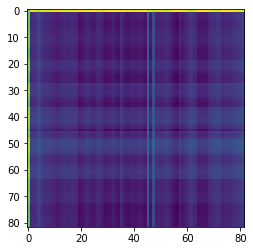

In [379]:
plt.imshow(attention_0[0,0].detach().cpu().numpy())

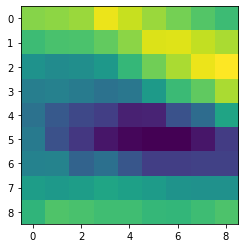

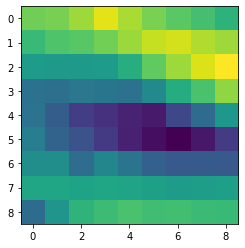

In [401]:
h = 1
r = 80
plt.imshow(attention_0[0,h,r,1:].reshape(9,9).detach().cpu().numpy())
plt.show()
plt.imshow(attention_0[1,h,r,1:].reshape(9,9).detach().cpu().numpy())
plt.show()

In [410]:
# r=1
# for h in range(1,8):
#     plt.imshow(attention_0[0,h,r,1:].reshape(9,9).detach().cpu().numpy())
#     plt.show()
#     plt.imshow(attention_0[1,h,r,1:].reshape(9,9).detach().cpu().numpy())
#     plt.show()    


<Figure size 432x288 with 0 Axes>

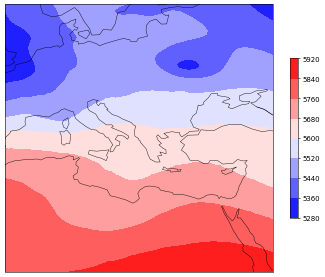

In [417]:
print_parameter(meteorology_valid[200],2)

In [423]:
# cyprus is aroung (6,8) of the 9*9 grid => num_patch = 6*9+8=62

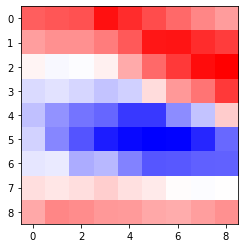

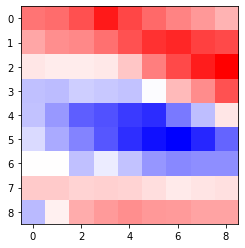

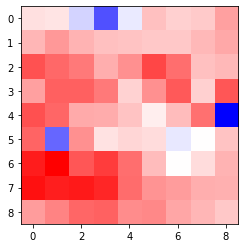

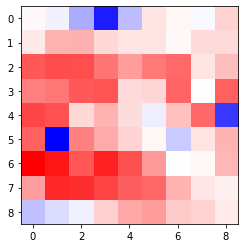

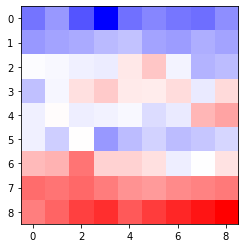

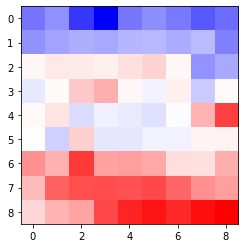

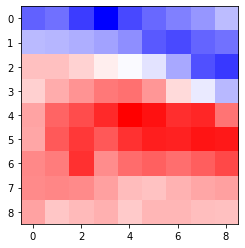

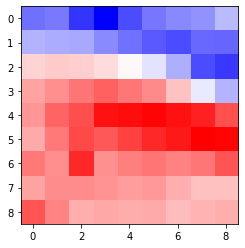

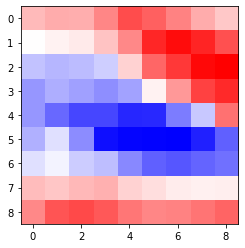

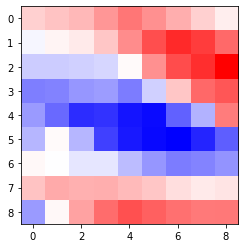

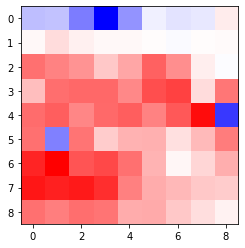

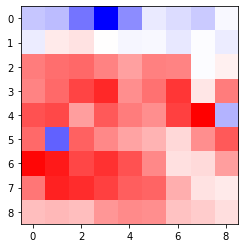

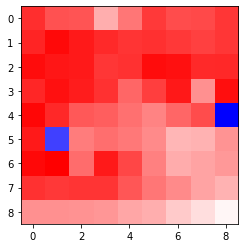

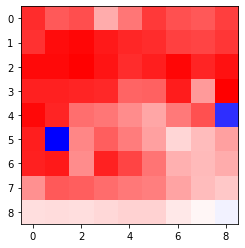

In [439]:
num_patch = 62
for h in range(1,8):
    plt.imshow(attention_0[0,h,num_patch,1:].reshape(9,9).detach().cpu().numpy())
    plt.show()
    plt.imshow(attention_0[1,h,num_patch,1:].reshape(9,9).detach().cpu().numpy())
    plt.show()    


In [2]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset,DataLoader
import timm.models.vision_transformer as ViT
import matplotlib.pyplot as plt
from torch.utils.data.dataloader import default_collate 
from tqdm import tqdm

import sys
sys.path.insert(0, '../../packages/')
from data_handlers.DustPredictionDataset import *
from training.train_model import *
from data_handlers.augmentations import *
from utils.training_loop_plotting import *
# from utils.meteorology_printing import * # Can't install on docker...

results_dir = "../../results_models/presentation/"

print_strs = ["dust(t=0)","\u0394dust(t=0)","dust(t=-24h)","\u0394dust(t=-24h)",
              "dust(t=24h)","\u0394dust(t=24h)","dust(t=48h)","\u0394dust(t=48h)",
              "dust(t=72h)","\u0394dust(t=72h)",]
print_cols = [i for i in range(10)]

def print_all_losses(train_losses, valid_losses,
                     train_lags_losses, train_delta_lags_losses, 
                     valid_lags_losses, valid_delta_lags_losses, title):
    print(title)
    print("Loss for training:")
    plot_train_valid(train_losses,valid_losses)
    print("Losses, separated per lag:")
    for i in print_cols:
        print(print_strs[i])
        if i%2==0:
            plot_train_valid(train_lags_losses[:,i//2],valid_lags_losses[:,i//2])
        else:
            plot_train_valid(train_delta_lags_losses[:,i//2],valid_delta_lags_losses[:,i//2])


In [3]:
data_dir = "../../data/presentation_examinations/"


meteorology_valid = torch.load(data_dir+"meteorology_2017.pkl")
meteorology_train = torch.load(data_dir+"meteorology_2018.pkl")
dust_valid = torch.load(data_dir+"dust_2017.pkl")
dust_train = torch.load(data_dir+"dust_2018.pkl")
times_valid = torch.load(data_dir+"times_2017.pkl")
times_train = torch.load(data_dir+"times_2018.pkl")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

valid_dataset = DustPredictionDataset(meteorology_valid,dust_valid,times_valid)
train_dataset = DustPredictionDataset(meteorology_train,dust_train,times_train)

valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False,collate_fn=valid_dataset.collate_fn)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False,collate_fn=train_dataset.collate_fn)

sample_data = next(iter(valid_loader))
print("Sample data loading:")
print(sample_data[0][0].shape, sample_data[0][1].shape, len(sample_data[1]))

model = ViT.VisionTransformer(img_size=(81,81), patch_size=(9,9), in_chans=17, num_classes=10, embed_dim=512, depth=8,
                 num_heads=8, mlp_ratio=2., qkv_bias=True, representation_size=None, distilled=False,
                 drop_rate=0.1, attn_drop_rate=0.1, drop_path_rate=0.1)
model.to(device)

# model_dir = results_dir+"presentation_set_e300_lr0p00001_augmentation_weighted_loss/" #1
# model_dir = results_dir+"presentation_set_e450_lr0p0001_noaugmentation/" #2
model_dir = results_dir+"presentation_set_e600_lr0p00001_noaugmentation_weighted_loss/" #3
# model_dir = results_dir+"weighted_loss_split5/" #4

# model_state_path = model_dir+"best_model_state.pt"
model_state_path = model_dir+"last_model_state.pt"

model.load_state_dict(torch.load(model_state_path))
model.to(device)
model.eval()

cuda
Sample data loading:
torch.Size([64, 17, 81, 81]) torch.Size([64, 10]) 64


VisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(17, 512, kernel_size=(9, 9), stride=(9, 9))
    (norm): Identity()
  )
  (pos_drop): Dropout(p=0.1, inplace=False)
  (blocks): Sequential(
    (0): Block(
      (norm1): LayerNorm((512,), eps=1e-06, elementwise_affine=True)
      (attn): Attention(
        (qkv): Linear(in_features=512, out_features=1536, bias=True)
        (attn_drop): Dropout(p=0.1, inplace=False)
        (proj): Linear(in_features=512, out_features=512, bias=True)
        (proj_drop): Dropout(p=0.1, inplace=False)
      )
      (drop_path): Identity()
      (norm2): LayerNorm((512,), eps=1e-06, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=512, out_features=1024, bias=True)
        (act): GELU()
        (fc2): Linear(in_features=1024, out_features=512, bias=True)
        (drop): Dropout(p=0.1, inplace=False)
      )
    )
    (1): Block(
      (norm1): LayerNorm((512,), eps=1e-06, elementwise_affine=True)
      (attn): 

In [9]:
def calculate_attention_maps_batch(meteorology, model, device_calc, num_layer=7):
    """
        takes batches and not the full tensor
    """
    x_patched = model.patch_embed(meteorology.to(device_calc))
    cls_token = model.cls_token.expand(x_patched.shape[0], -1, -1) 
    x = torch.cat((cls_token, x_patched), dim=1)
    B,N,C = x.shape
    for block in model.blocks[:num_layer]:
        x = block(x)
    layer_block = model.blocks[num_layer]
    layer_attn = layer_block.attn
    qkv = layer_attn.qkv(layer_block.norm1(x)).reshape(B, N, 3, layer_attn.num_heads, 
                                                       C // layer_attn.num_heads,).permute(2, 0, 3, 1, 4)
    q, k, v = qkv[0], qkv[1], qkv[2]
    attention = (q @ k.transpose(-2, -1)) * layer_attn.scale
    return attention

In [10]:
def calculate_attention_maps(model, loader, device_calc, num_layer=7):
    attention_maps = []
    model.to(device_calc)
    model.eval()
    for minibatch, _ in tqdm(loader):
        x = minibatch[0].float()
        x = x.to(device=device_calc)
        attn_batch = calculate_attention_maps_batch(x, model, device_calc, num_layer=num_layer)
        attention_maps.append(attn_batch)
    return attention_maps #torch.cat(attention_maps,0) 

In [11]:
#np.vstack(predictions_list)pred.data.cpu().numpy()

In [16]:
model.to("cpu")
attn_valid_event = calculate_attention_maps_batch(meteorology_valid[430:520], model, device_calc="cpu", num_layer=7)
attn_valid_event.shape

torch.Size([90, 8, 82, 82])

In [19]:
torch.save(attn_valid_event,results_dir+"attn_valid_event.pkl")

In [20]:
model.to("cpu")
attn_valid_clear = calculate_attention_maps_batch(meteorology_valid[275:365], model, device_calc="cpu", num_layer=7)
attn_valid_clear.shape

torch.Size([90, 8, 82, 82])

In [ ]:
torch.save(attn_valid_clear,results_dir+"attn_valid_event.pkl")

In [21]:
attentions = [attn_valid_event,attn_valid_clear]

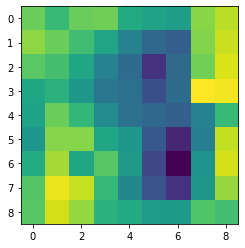

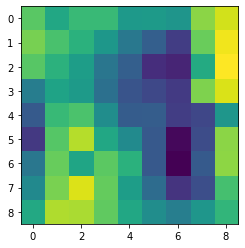

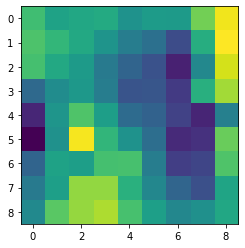

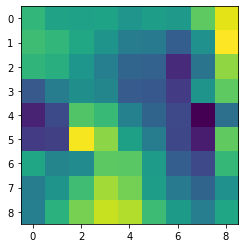

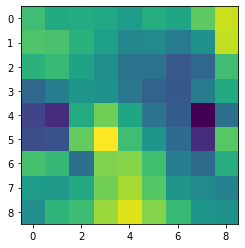

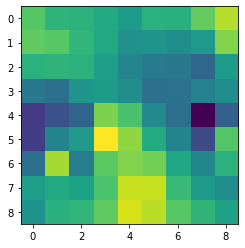

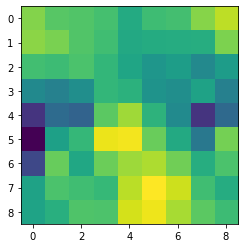

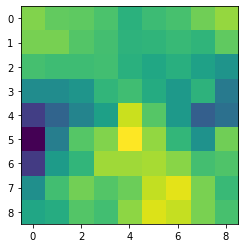

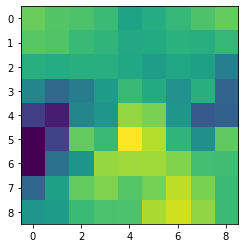

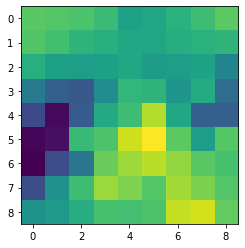

In [156]:
for i in range(0,10):
    plt.imshow(attn_sample[i,0,62,1:].reshape(9,9).detach().cpu().numpy())
    plt.show()

In [ ]:
# meteorology_valid = torch.load(data_dir+"meteorology_2017.pkl")
# meteorology_train = torch.load(data_dir+"meteorology_2018.pkl")
# dust_valid = torch.load(data_dir+"dust_2017.pkl")
# dust_train = torch.load(data_dir+"dust_2018.pkl")
# times_valid = torch.load(data_dir+"times_2017.pkl")
# times_train = torch.load(data_dir+"times_2018.pkl")

In [63]:
# slide for presentation - panel of: 2 rows of 8 heads (row for patch), dust with vertical line (current time)
# X2 - two different periods (5,11)

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

def plot_attention_maps_presentation_h8(attentions,dusts,times,period_idxs,current_idxs,
                                        th=73.4,num_ticks=6,patch_nums=[0,62],
                                        dust_titles=["Dust Event","Clear Day"]): #attns, dusts, dates, period_idxs, current_idx)
    """
        attns - list of 2 attentions of size [len_of_period, 8, 82, 82]  ### NOT but will be: tensor of all attentions, size [len_all_dust,8,82,82]
        dusts - list of 2 dust to plot, of sizes [len_all_dust]
        dates - list of 2 dates for xticks, of size [len_all_dust]
        period_idxs - list of 2 np.array of size [len_of_period]
        current_idxs - list of 2 - the current idx inside the period
    """
    fig = plt.figure(figsize=(12, 6), dpi=80)#tight_layout=True)
    gs = gridspec.GridSpec(5, 11)
    for dust_idx, gs_row in enumerate([0, 3]):
        for row in [gs_row,gs_row+1]:
            for h in range(8):
                ax = fig.add_subplot(gs[row, h])
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
                if row==0 or row==3:
                    ax.set_title("Head "+str(h))
                    outline_color="black"
                    attn_patch_idx = patch_nums[0]
                else:
                    outline_color="pink"
                    attn_patch_idx = patch_nums[1]
                attn = attentions[dust_idx][current_idxs[dust_idx]-period_idxs[dust_idx][0],
                                            h,attn_patch_idx,1:].reshape(9,9)
                ax.imshow(attn.detach().cpu().numpy())
                ax.spines['bottom'].set_color(outline_color)
                ax.spines['top'].set_color(outline_color) 
                ax.spines['right'].set_color(outline_color)
                ax.spines['left'].set_color(outline_color)
        ax = fig.add_subplot(gs[gs_row:gs_row+2, 8:])
        dust = dusts[period_idxs[dust_idx]]
        x = np.arange(dust.shape[0])
        time_ticks = times[x]
        time_ticks = time_ticks[::(x.shape[0]//num_ticks)]
        time_ticks = [t.strftime("%x") for t in time_ticks]
        x_for_xticks = x[::(x.shape[0]//num_ticks)]
        ax.plot(x,dust)
        ax.plot(x,x*0+th,"--r")
        ax.vlines(x=current_idxs[dust_idx]-period_idxs[dust_idx][0], ymin=0, ymax=800, colors='purple')
        ax.set_xticks(x_for_xticks)
        ax.set_xticklabels(time_ticks)
        ax.tick_params(labelrotation=90)
        ax.yaxis.set_label_position("right")
        ax.yaxis.tick_right()
        ax.set_title(dust_titles[dust_idx])
    plt.show()
    

    


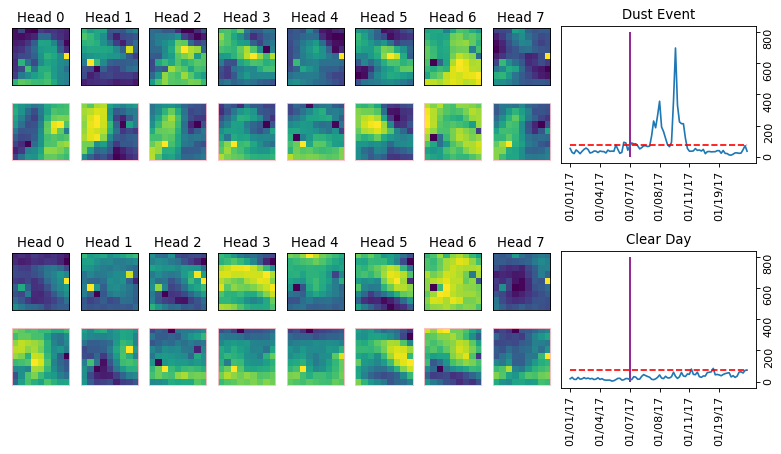

In [64]:
period_idxs_event = np.arange(430,520)
current_idx_event = 460
# period_idxs_clear = np.arange(1050,1100)
period_idxs_clear = np.arange(275,365)
current_idx_clear = 305
period_idxs = [period_idxs_event,period_idxs_clear]
current_idxs = [current_idx_event,current_idx_clear]
plot_attention_maps_presentation_h8(attentions,dust_valid[:,0],times_valid,period_idxs,current_idxs)

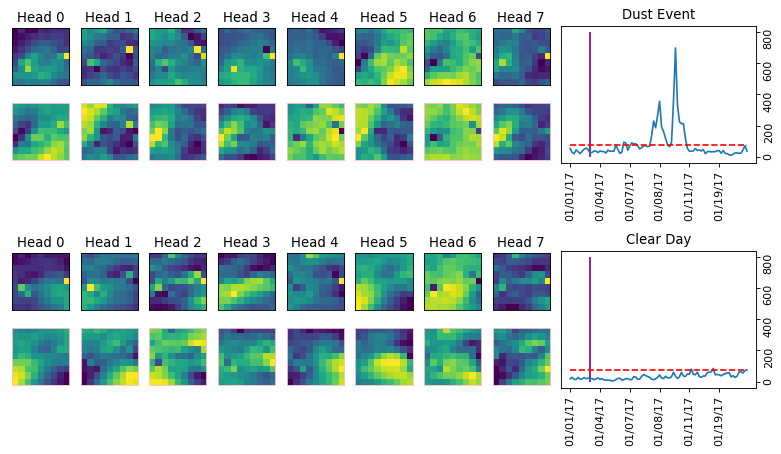

In [65]:
current_idx_event = 440
current_idx_clear = 285
current_idxs = [current_idx_event,current_idx_clear]
plot_attention_maps_presentation_h8(attentions,dust_valid[:,0],times_valid,period_idxs,current_idxs)

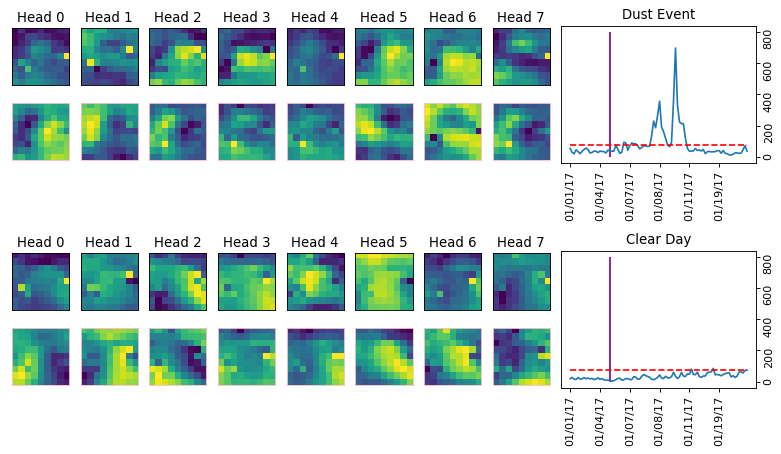

In [66]:
current_idx_event = 450
current_idx_clear = 295
current_idxs = [current_idx_event,current_idx_clear]
plot_attention_maps_presentation_h8(attentions,dust_valid[:,0],times_valid,period_idxs,current_idxs)

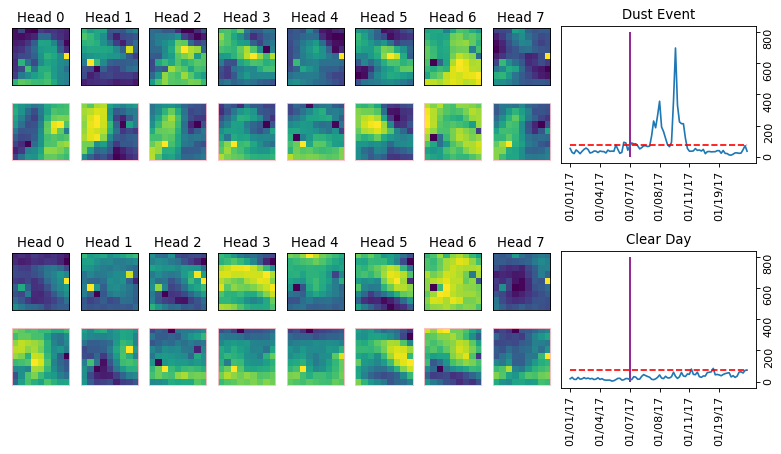

In [67]:
current_idx_event = 460
current_idx_clear = 305
current_idxs = [current_idx_event,current_idx_clear]
plot_attention_maps_presentation_h8(attentions,dust_valid[:,0],times_valid,period_idxs,current_idxs)

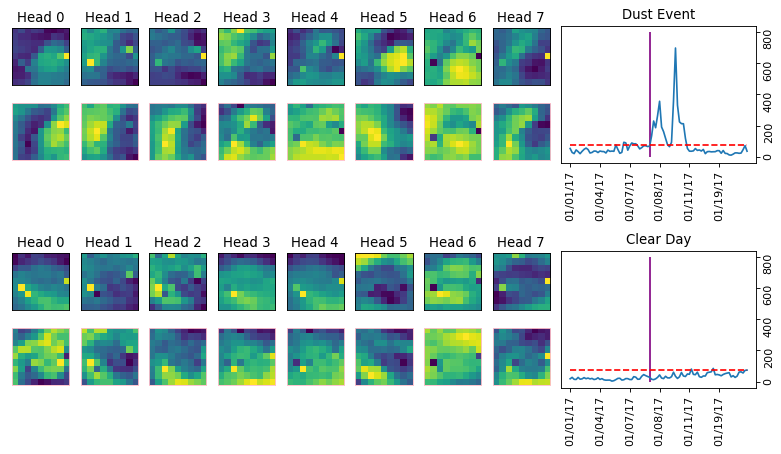

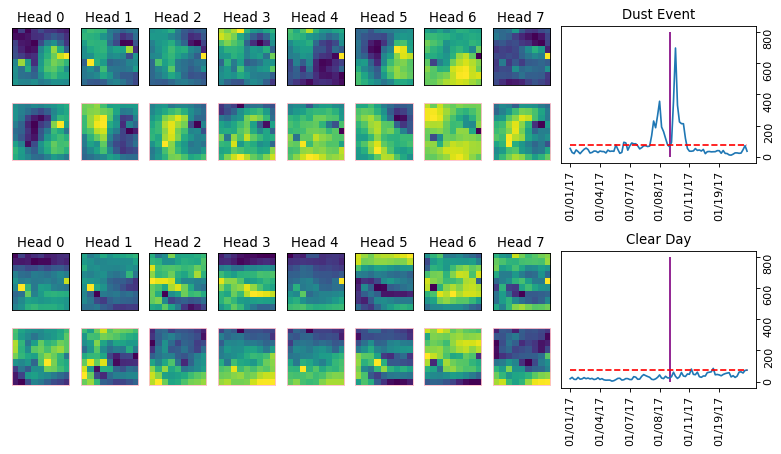

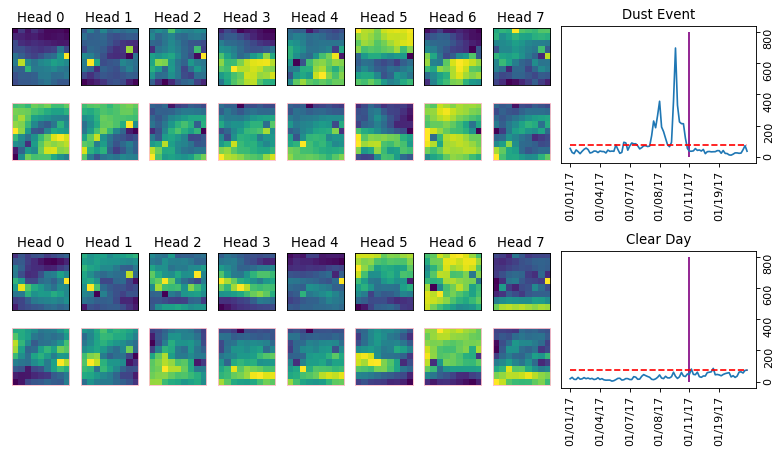

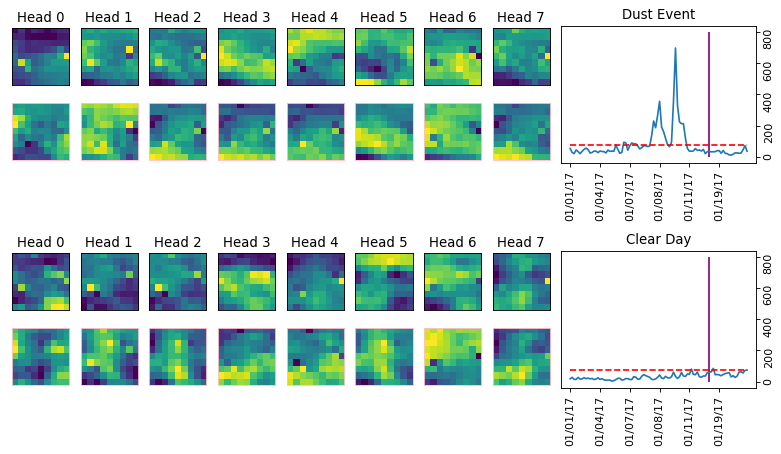

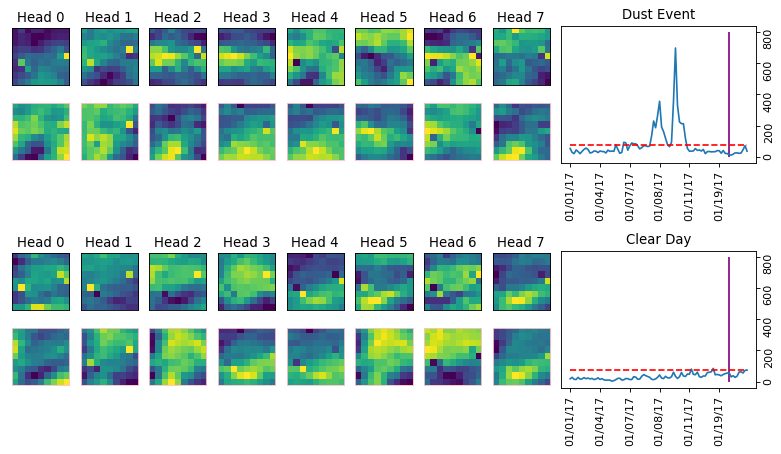

In [68]:
current_idx_event = 470
current_idx_clear = 315
current_idxs = [current_idx_event,current_idx_clear]
plot_attention_maps_presentation_h8(attentions,dust_valid[:,0],times_valid,period_idxs,current_idxs)
current_idx_event = 480
current_idx_clear = 325
current_idxs = [current_idx_event,current_idx_clear]
plot_attention_maps_presentation_h8(attentions,dust_valid[:,0],times_valid,period_idxs,current_idxs)
current_idx_event = 490
current_idx_clear = 335
current_idxs = [current_idx_event,current_idx_clear]
plot_attention_maps_presentation_h8(attentions,dust_valid[:,0],times_valid,period_idxs,current_idxs)
current_idx_event = 500
current_idx_clear = 345
current_idxs = [current_idx_event,current_idx_clear]
plot_attention_maps_presentation_h8(attentions,dust_valid[:,0],times_valid,period_idxs,current_idxs)
current_idx_event = 510
current_idx_clear = 355
current_idxs = [current_idx_event,current_idx_clear]
plot_attention_maps_presentation_h8(attentions,dust_valid[:,0],times_valid,period_idxs,current_idxs)

In [75]:
import imageio
filenames_dir = "/home/dori/w/Studies/courses/DL4CV/project_presentation/gif/"
image_paths = [filenames_dir+str(i)+".png" for i in range(1,9)]
images=[]
for filename in image_paths:
    images.append(imageio.imread(filename))
imageio.mimsave(filenames_dir+"clip.gif", images, fps=3)

In [82]:
valid_tsne_scatter = torch.load(results_dir+"tSNE_valid_presentation.pkl")

In [83]:
valid_tsne_scatter.shape

(2183, 2)

In [ ]:
train_tsne_scatter = torch.load(results_dir+"tSNE_train_presentation_6000.pkl")